# Introduction
Classification is a process of dividing the given data points into two or more classes. When the number of classes = 2, it is known as Binary Classification.

In this notebook, we'll be performing Binary Classification to **predict whether a person has a heart disease or not.**

There are 2 classes:
1. Heart disease present (target=1)
2. Heart disease not present (target=0)

# Data Description
* **age:** Age in years
* **sex:** 1 = male, 0 = female
* **cp:** Chest pain type
* **trestbps:** Resting blood pressure (in mm Hg on admission to the hospital)
* **chol:** serum cholesterol in mg/dl
* **fbs:** fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
* **restecg:**Resting electrocardiographic results
* **thalach:** Maximum heart rate achieved
* **exang:** Exercise induced angina (1 = yes; 0 = no)
* **oldpeak:** ST depression induced by exercise relative to rest
* **slope:** The slope of the peak exercise ST segment
* **ca:** Number of major vessels (0-3) colored by fluoroscopy
* **thal:** 3 = normal; 6 = fixed defect; 7 = reversible defect
* **target:** 1 = Heart disease present, 0 = Heart disease not present

# Loading the basic Data Science Libraries


In [127]:
import numpy as np  # for matrix operations
import pandas as pd  # for loading CSV Files
import matplotlib.pyplot as plt # for Data Visualization

# Loading Data
Pandas module is used for reading files. Since we have our data in '.csv' format, we will use 'read_csv()' function for loading the data

In [128]:
data = pd.read_csv("heart.csv")

In [129]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [130]:
data.shape # This gives the shape of the DataFrame i.e the (no. of rows, no. of columns)

(303, 14)

In [131]:
data.isnull().sum() #Checking null values in the dataset

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Separating Input and Target Variable
**Target Variable/ Independent Variable(y):** Our objective is to detect the presence of heart disease. Thus, our target variable will be the column that indicates whether heart disease is present or not. 

We'll store that column in a variable y.

**Input Variables/ Dependent Variables(X):** The remaining columns, without the Target variable will be stored in variable X.

In [132]:
X = data.drop('target', axis=1) #Input variables
# axis=1 indicates that a column will be dropped
y = data['target']  # Target variable

# Splitting into Train and Test Sets
The next step will be to divide the data into test and train sets. We want to check the performance of the model that we built. For this purpose, we always split (both input and output data) the given data into **train set** which will be used to train the model, and **test set** which will be used to check how accurately the model is predicting outcomes.

This is achieved using `train_test_split` function provided in the `model_selection class of sklearn` module.

By passing our X and y variables into the train_test_split method, we are able to capture the splits in data by assigning 4 variables to the result.

* **X_train:** independent/input feature data for training the model
* **y_train:** dependent/output feature data for training the model
* **X_test:** independent/input feature data for testing the model; will be used to predict the output values
* **y_test:** original dependent/output values of X_test; We will compare this values with our predicted values to check the performance of our built model.
* **test_size = 0.20:** 20% of the data will go for test set and 80% of the data will go for train set
* **random_state = 42:** this is just for code reproducability. It will fix the split i.e. there will be the same data in train and test sets each time we run the code

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
# number of input features
X_train.shape[1]

13

# Model Building
Now that we have our data fully processed and split into training and testing datasets, we can begin building a neural network to solve this classification problem. 

In [135]:
# Imports
import tensorflow as tf  # Importing the TensorFlow Library
from tensorflow import keras  # Import Keras from TensorFlow

from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

## Model Creation/ Definition
We create a Sequential model and add layers one at a time until we are happy with our network architecture.

The first thing to get right is to ensure the input layer has the right number of input features.

Since this is a binary classification problem, we will use a sigmoid activation function in the final layer of our network.

**Sigmoid is commonly used in the output layer. This is because it helps in giving a probability(value between 0 and 1) which is useful in Binary Classification.**

### Our model architecture
For our model, we'll be considering the following:

* Input = the no. of features in X_train = 13
* No. of neurons/units in first Dense layer = 32
* No. of neurons/units in second Dense layer = 16
* No. of neurons/units in third Dense layer = 8
* No. of neurons/units in output layer = 1

If you closely look at it, we're slowly decreasing the number of neurons in each layer. Deciding the no. of hidden layers and no. of neurons is a process of trial and error. 

In [136]:
# Building the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))   
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

* The above code creates a Neural Network that has 4 layers. 

* The **last node** uses the **sigmoid activation function** that will squeeze all the values between 0 and 1.

* The other layers use **ReLU (Rectified Linear Units)** as the activation function. ReLU is a half rectified function; that is, for all the inputs less than 0 (e.g. -120,-6.7, -0.0344, 0) the value is 0 while for anything positive (e.g. 10,15, 34) the value is retained. 

* One output unit is used since for each record values in X, a probability will be predicted. If it is high, then the person has a heart disease. If it is less, then the person does not have a heart disease.

# Model Compilation

In [137]:
# Compiling the model
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001)  # Here, we have set our learning rate as 0.001
model.compile(loss='binary_crossentropy', optimizer= optimizer , metrics=['accuracy'])

* The above code compiles the network.

* The **loss function** used is **binary_crossentropy**. For binary classification problems that give output in the form of probability, binary_crossentropy is usually the optimizer of choice.

*  It uses **rmsprop** as an **optimizer**. 

* The **learning rate** is taken to be **0.001**. You can even try different values to see which works the best.It is important to find a good value for the learning rate for your model on your training dataset. 

  We cannot analytically calculate the optimal learning rate for a given model on a given dataset. Instead, a good (or good enough) learning rate must be discovered via trial and error.

  The range of values to consider for the learning rate is less than 1.0 and greater than $10^{-6}$.

  A traditional default value for the learning rate is 0.1, 0.01 or 0.001, and this may represent a good starting point on your problem.

* **Metrics** used to evaluate the model is **accuracy**. Accuracy calculates how often the predictions calculated by the model are correct.

In [138]:
# printing the summary of the model
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_41 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_42 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 9         
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


## Model Training
The model is initially trained for **200 epochs** with a **batch size of 10**. 
Both epochs and batch size are hyperparameters that can be modified to optimise the model.

**validation_split:** Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
The val_loss and val_accuracy that you can see below are calculated with this validation data.

You'll learn more about the importance of validation data later. 

**verbose:** Verbose is just for printing purposes, for making the output more readable.



### History
Notice that we're saving the trained model to a variable **history**. 

When running a model, Tensorflow Keras maintains a so-called History object in the background. This object keeps all loss values and other metric values in memory so that they can be used for visualizations.

The history object is the output of the fit operation.

In [139]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=1)

Train on 193 samples, validate on 49 samples
Epoch 1/200
193/193 [==============================] - 0s 2ms/sample - loss: 1.7711 - accuracy: 0.4870 - val_loss: 1.8052 - val_accuracy: 0.4082
Epoch 2/200
193/193 [==============================] - 0s 289us/sample - loss: 0.9388 - accuracy: 0.4922 - val_loss: 0.7412 - val_accuracy: 0.4898
Epoch 3/200
193/193 [==============================] - 0s 300us/sample - loss: 0.7897 - accuracy: 0.5855 - val_loss: 0.7075 - val_accuracy: 0.6122
Epoch 4/200
193/193 [==============================] - 0s 289us/sample - loss: 0.6464 - accuracy: 0.6632 - val_loss: 0.6545 - val_accuracy: 0.6735
Epoch 5/200
193/193 [==============================] - 0s 295us/sample - loss: 0.7272 - accuracy: 0.6477 - val_loss: 1.0059 - val_accuracy: 0.5714
Epoch 6/200
193/193 [==============================] - 0s 284us/sample - loss: 0.7378 - accuracy: 0.6010 - val_loss: 0.6440 - val_accuracy: 0.6735
Epoch 7/200
193/193 [==============================] - 0s 284us/sample - lo

Epoch 55/200
193/193 [==============================] - 0s 248us/sample - loss: 0.4322 - accuracy: 0.7824 - val_loss: 0.4873 - val_accuracy: 0.7755
Epoch 56/200
193/193 [==============================] - 0s 269us/sample - loss: 0.5016 - accuracy: 0.7202 - val_loss: 0.4833 - val_accuracy: 0.7755
Epoch 57/200
193/193 [==============================] - 0s 258us/sample - loss: 0.4532 - accuracy: 0.7979 - val_loss: 0.4371 - val_accuracy: 0.7755
Epoch 58/200
193/193 [==============================] - 0s 258us/sample - loss: 0.5069 - accuracy: 0.7720 - val_loss: 0.5844 - val_accuracy: 0.6735
Epoch 59/200
193/193 [==============================] - 0s 243us/sample - loss: 0.5049 - accuracy: 0.7565 - val_loss: 0.4865 - val_accuracy: 0.7959
Epoch 60/200
193/193 [==============================] - 0s 269us/sample - loss: 0.4908 - accuracy: 0.7565 - val_loss: 0.4584 - val_accuracy: 0.7143
Epoch 61/200
193/193 [==============================] - 0s 269us/sample - loss: 0.4825 - accuracy: 0.7668 - val_

193/193 [==============================] - 0s 357us/sample - loss: 0.3694 - accuracy: 0.8135 - val_loss: 1.0265 - val_accuracy: 0.6939
Epoch 111/200
193/193 [==============================] - 0s 362us/sample - loss: 0.4765 - accuracy: 0.7979 - val_loss: 0.4046 - val_accuracy: 0.8163
Epoch 112/200
193/193 [==============================] - 0s 393us/sample - loss: 0.3956 - accuracy: 0.8031 - val_loss: 0.8057 - val_accuracy: 0.5918
Epoch 113/200
193/193 [==============================] - 0s 315us/sample - loss: 0.4517 - accuracy: 0.7772 - val_loss: 0.4097 - val_accuracy: 0.7755
Epoch 114/200
193/193 [==============================] - 0s 300us/sample - loss: 0.4028 - accuracy: 0.8290 - val_loss: 0.4141 - val_accuracy: 0.7755
Epoch 115/200
193/193 [==============================] - 0s 320us/sample - loss: 0.3821 - accuracy: 0.8031 - val_loss: 0.7188 - val_accuracy: 0.7347
Epoch 116/200
193/193 [==============================] - 0s 372us/sample - loss: 0.4064 - accuracy: 0.8290 - val_loss: 0

193/193 [==============================] - 0s 222us/sample - loss: 0.3827 - accuracy: 0.8187 - val_loss: 0.5820 - val_accuracy: 0.6939
Epoch 166/200
193/193 [==============================] - 0s 222us/sample - loss: 0.3758 - accuracy: 0.8238 - val_loss: 0.9533 - val_accuracy: 0.5714
Epoch 167/200
193/193 [==============================] - 0s 243us/sample - loss: 0.3806 - accuracy: 0.8290 - val_loss: 0.5353 - val_accuracy: 0.7959
Epoch 168/200
193/193 [==============================] - 0s 238us/sample - loss: 0.3831 - accuracy: 0.8135 - val_loss: 0.4641 - val_accuracy: 0.7755
Epoch 169/200
193/193 [==============================] - 0s 238us/sample - loss: 0.4003 - accuracy: 0.7876 - val_loss: 0.3938 - val_accuracy: 0.8163
Epoch 170/200
193/193 [==============================] - 0s 243us/sample - loss: 0.3679 - accuracy: 0.8238 - val_loss: 0.7964 - val_accuracy: 0.6122
Epoch 171/200
193/193 [==============================] - 0s 233us/sample - loss: 0.3878 - accuracy: 0.8187 - val_loss: 0

The validation accuracy predicted by the model is around 80%. It can further be increased by trying to optimize the epochs, the number of layers or the number of nodes per layer.

## Model Evaluation
Evaluating the model requires that we first choose a separate dataset used to evaluate the model. This should be data not used in the training process i.e. the X_test.

Now, let us use the trained model to predict the probability values for the new data set - The test set we had initially created. The below code passes the X_test and y_test to the trained model and gives out the probability.

In [140]:
model.evaluate(X_test, y_test)

61/61 [==============================] - 0s 98us/sample - loss: 0.4547 - accuracy: 0.8361


[0.45473667637246556, 0.8360656]

### Model Accuracy
Now, we'll use the history object created above to plot the Accuracy and Loss throughout the training process.

You can think of history.history as a Python dictionary from which the values can be obtained by specifying a key within square brackets.

For eg. `history.history['accuracy']` will give the train accuracy throughout the training process.

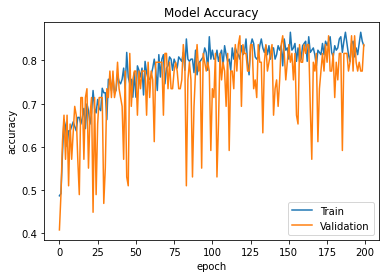

In [141]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

### Model Loss

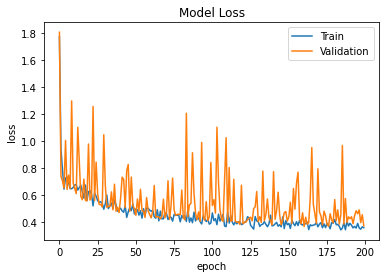

In [142]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Conclusion
In this example, we developed a working Neural Network for the binary classification problem.

The model can be optimised further using hyperparameter tuning and other techniques.